In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
columns_names=['user_id','item_id','rating','timestamp']

In [43]:
df=pd.read_csv(r"C:\Users\ankit\Desktop\Great learning\udemy\Machine learning\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\u.data",
              sep="\t",names=columns_names)

In [44]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [45]:
movie_titles=pd.read_csv(r"C:\Users\ankit\Desktop\Great learning\udemy\Machine learning\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\Movie_Id_Titles")

In [46]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [47]:
df_merge=pd.merge(df,movie_titles,on='item_id')

In [48]:
df_merge

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [49]:
df_merge.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [50]:
rating=df_merge.groupby('title')['rating'].agg(['count', 'mean'])

In [51]:
rating=pd.DataFrame(rating)

In [52]:
rating

,count,mean
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


In [53]:
rating=rating.rename({"count":"number of rating","mean" :"Avg ratings"},axis=1)

In [54]:
rating

,number of rating,Avg ratings
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


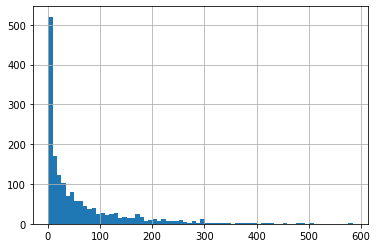

In [55]:
rating["number of rating"].hist(bins=70)

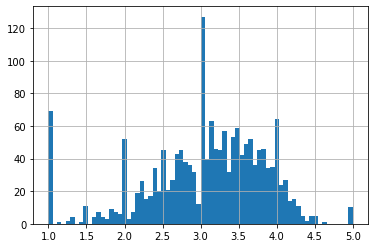

In [56]:
rating["Avg ratings"].hist(bins=70)

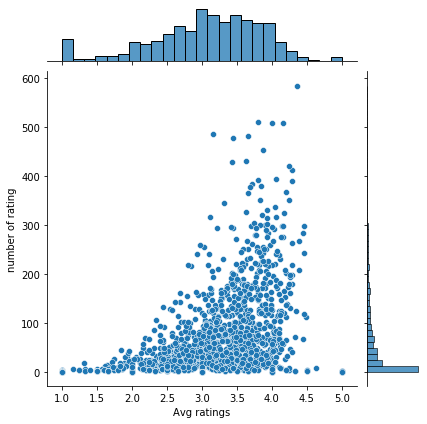

In [57]:
sns.jointplot(x="Avg ratings",y="number of rating",data=rating)

In [58]:
df_merge

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [59]:
moviemat=df_merge.pivot_table(index="user_id",columns='title',values='rating')

In [60]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
rating.sort_values('number of rating',ascending=False)

,number of rating,Avg ratings
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
"Great Day in Harlem, A (1994)",1,5.000000
"Other Voices, Other Rooms (1997)",1,3.000000
Good Morning (1971),1,1.000000


In [62]:
starwar_user_rating=moviemat['Star Wars (1977)']
liarliar_user_rating=moviemat['Liar Liar (1997)']

In [63]:
starwar_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [64]:
similar_to_starwars=moviemat.corrwith(starwar_user_rating)

C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [65]:
corr_starwar=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwar.dropna(inplace=True)

In [66]:
corr_starwar

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [67]:
corr_starwar.sort_values("Correlation",ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [68]:
corr_starwar=corr_starwar.join(rating["number of rating"])

In [69]:
corr_starwar

,Correlation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [70]:
corr_starwar[corr_starwar["number of rating"]>100].sort_values("Correlation",ascending=False)

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [71]:
corr_liar=liarliar_user_rating
corr_liar

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [72]:
corr_liar=pd.DataFrame(moviemat.corrwith(liarliar_user_rating),columns=["correlation"])
corr_liar.dropna(inplace=True)

C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [73]:
corr_liar=corr_liar.join(rating['number of rating'])

In [77]:
corr_liar[corr_liar["number of rating"]>100].sort_values(by="correlation",ascending=False)

,correlation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
